In [54]:
key="b4fe90ed47f647b5b95b90cf976db83f"
endpoint="https://staging-language-model.cognitiveservices.azure.com/"

In [55]:
import pandas as pd

In [56]:
data=pd.read_csv("Reviews.csv")
data=data.head(10)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [57]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [58]:
client=TextAnalyticsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

In [59]:
def Analyse_Summary(summary):
    summary_sentiment=client.analyze_sentiment(summary)
    sent_res=[]
    for i in summary_sentiment:
        sent_res.append(i.sentiment)
    return sent_res



In [60]:
lis=list(data['Summary'])

In [61]:
print(lis)

['Good Quality Dog Food', 'Not as Advertised', '"Delight" says it all', 'Cough Medicine', 'Great taffy', 'Nice Taffy', 'Great!  Just as good as the expensive brands!', 'Wonderful, tasty taffy', 'Yay Barley', 'Healthy Dog Food']


In [63]:
sentiment=Analyse_Summary(lis)
print(sentiment)

['positive', 'negative', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive']


In [64]:
def key_phrase(Text):
    key_res=[]
    summary_keyphrase=client.extract_key_phrases(Text)
    for i in summary_keyphrase:
        key_res.append(i.key_phrases)
    return key_res

In [65]:
lis1=data['Text'].to_list()

In [66]:
print(key_phrase(lis1))

[['Vitality canned dog food products', 'good quality', 'processed meat', 'My Labrador', 'stew'], ['Jumbo Salted Peanuts', 'Product', 'error', 'vendor'], ['light, pillowy citrus gelatin', 'C.S. Lewis', 'tiny squares', 'powdered sugar', 'tiny mouthful', 'The Lion', 'The Wardrobe', 'yummy treat', 'The Witch', 'confection', 'centuries', 'nuts', 'case', 'Filberts', 'heaven', 'story', 'Edmund', 'Brother', 'Sisters'], ['Root Beer Extract', 'secret ingredient', 'cherry soda', 'Robitussin', 'addition', 'flavor'], ['Great taffy', 'great price', 'wide assortment', 'yummy taffy', 'taffy lover', 'Delivery', 'deal'], ['five pound bag', 'red/black licorice-flavored pieces', 'wild hair', 'many flavors', 'root beer', 'particular favorites', 'delightful treat', 'taffy', 'watermelon', 'peppermint', 'grape', 'complaint', 'kids', 'husband', 'two', 'brand'], ['saltwater taffy', 'great flavors', 'expensive version', 'beach-themed party', 'candy', 'None', 'candies', 'Fralinger', 'everyone'], ['taffy', 'flavor

In [67]:
def entities(Text):
    entities=[]
    ent_res=client.recognize_entities(Text[0:5])
    for i in ent_res:
        entities.append([(entity.text, entity.category, entity.subcategory) for entity in i.entities])
    return entities
        

In [68]:
for i in entities(lis1):
    print(i)

[('Vitality', 'Organization', 'Sports'), ('canned dog food products', 'Product', None), ('stew', 'Product', None), ('processed meat', 'Product', None), ('product', 'Product', None)]
[('Product', 'Product', None), ('Jumbo Salted Peanuts', 'Product', None), ('peanuts', 'Product', None), ('vendor', 'PersonType', None)]
[('confection', 'Product', None), ('gelatin', 'Product', None), ('Filberts', 'Product', None), ('powdered sugar', 'Product', None), ('heaven', 'Location', 'Structural'), ('C.S. Lewis', 'Person', None), ('Edmund', 'Person', None), ('Brother', 'PersonType', None), ('Sisters', 'PersonType', None), ('Witch', 'PersonType', None)]
[('Robitussin', 'Product', None), ('Root Beer Extract', 'Product', None), ('cherry soda', 'Product', None)]
[('taffy', 'Product', None), ('taffy', 'Product', None), ('Delivery', 'Skill', None), ('lover', 'PersonType', None)]


In [69]:
import matplotlib.pyplot as plt

(array([8., 2.]), array([0., 1., 2.]), <BarContainer object of 2 artists>)

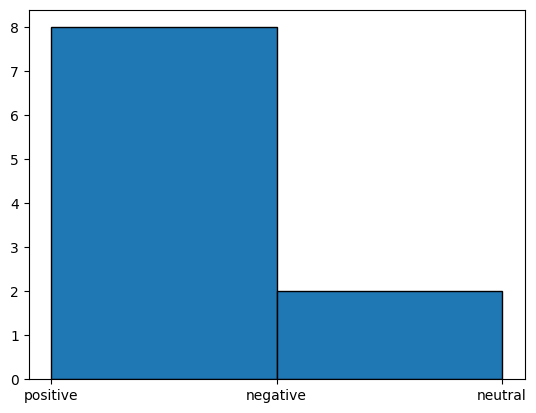

In [84]:
plt.hist(sentiment,bins=2,edgecolor='black')